# OkCupid Marketing Project



Online dating is a multi-billion dollar industry. The OkCupid userbase consists of more than 3.5 million active users. In aggregate, OkCupid's userbase has the most diverse demographics and data-rich profiles.

The marketing department at OkCupid would like to better understand its customers and potential customers. This will help the company to:
* measure user engagement (and engagements)
* create a baseline against which to evaluate the effectiveness of new marketing campaigns
* make recommendations for new products or features

In [636]:
import sqlite3
import pandas as pd


database = "okcupid_sqlite.db"
connection = sqlite3.connect(database)

df = pd.read_sql_query("""
        SELECT d.id, d.age,b.body_type, di.diet, dr.drinks, drg.drugs, d.ethnicity, d.last_online, d.location,
        d.offspring, ot.orientation, d.sex, s.smokes, st.status, c.income, c.job, h.heightcol, o.pets, o.religion,
        o.sign, o.speaks, e.education, b.BTID, di.DID,dr.DRID, drg.DRGID, ot.ORID, st.STSID, e.id, s.sid
        FROM demographic d
        LEFT JOIN  bodytype  b 
        ON  d.body_type = b.BTID
        LEFT JOIN diet  di
        ON d.diet = di.DID
        LEFT JOIN drinks  dr
        ON d.drinks = dr.DRID
        LEFT JOIN drugs  drg 
        ON drg.DRGID = d.drugs 
        LEFT JOIN status st
        ON d.status = st.stsid
        LEFT JOIN smoker s
        ON d.smokes = s.sid
        LEFT JOIN orientation ot
        ON d.orientation = ot.orid 
        LEFT JOIN career  c
        ON d.id = c.id
        LEFT JOIN height  h
        ON c.id = h.id
        LEFT JOIN other  o
        ON h.id = o.id 
        LEFT JOIN education  e
        ON o.id = e.id
        WHERE d.last_online BETWEEN '2016-01-01' AND '2017-12-31'
       
        
        
        
        
    """, connection)



df.head()

,id,age,body_type,diet,drinks,drugs,ethnicity,last_online,location,offspring,...,speaks,education,BTID,DID,DRID,DRGID,ORID,STSID,id,SID
0,1,22,a little extra,strictly anything,socially,never,"asian, white",2017-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",...,english,working on college/university,BT1,D1,DR1,DRG1,OR1,STS1,1,S1
1,2,35,average,mostly other,often,sometimes,white,2017-06-29-21-41,"oakland, california","doesn't have kids, but might want them",...,"english (fluently), spanish (poorly), french (...",working on space camp,BT2,D2,DR2,DRG2,OR1,STS1,2,S2
2,3,38,thin,anything,socially,None,None,2017-06-27-09-10,"san francisco, california",None,...,"english, french, c++",graduated from masters program,BT3,D3,DR1,None,OR1,STS2,3,S2
3,4,23,thin,vegetarian,socially,None,white,2017-06-28-14-22,"berkeley, california",doesn't want kids,...,"english, german (poorly)",working on college/university,BT3,D4,DR1,None,OR1,STS1,4,S2
4,5,29,athletic,None,socially,never,"asian, black, other",2017-06-27-21-26,"san francisco, california",None,...,english,graduated from college/university,BT4,None,DR1,DRG1,OR1,STS1,5,S2


In [539]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm 

%matplotlib inline 


In [540]:
df.columns

Index([u'id', u'age', u'body_type', u'diet', u'drinks', u'drugs', u'ethnicity',
       u'last_online', u'location', u'offspring', u'orientation', u'sex',
       u'smokes', u'status', u'income', u'job', u'heightcol', u'pets',
       u'religion', u'sign', u'speaks', u'education', u'BTID', u'DID', u'DRID',
       u'DRGID', u'ORID', u'STSID', u'id'],
      dtype='object')

In [541]:
df.shape

(59943, 29)

In [543]:
df.head()

,id,age,body_type,diet,drinks,drugs,ethnicity,last_online,location,offspring,...,sign,speaks,education,BTID,DID,DRID,DRGID,ORID,STSID,id
0,1,22,a little extra,None,socially,never,"asian, white",2017-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",...,gemini,english,working on college/university,BT1,None,DR1,DRG1,None,None,1
1,2,35,average,None,often,sometimes,white,2017-06-29-21-41,"oakland, california","doesn't have kids, but might want them",...,cancer,"english (fluently), spanish (poorly), french (...",working on space camp,BT2,None,DR2,DRG2,None,None,2
2,3,38,thin,None,socially,None,None,2017-06-27-09-10,"san francisco, california",None,...,pisces but it doesn&rsquo;t matter,"english, french, c++",graduated from masters program,BT3,None,DR1,None,None,None,3
3,4,23,thin,None,socially,None,white,2017-06-28-14-22,"berkeley, california",doesn't want kids,...,pisces,"english, german (poorly)",working on college/university,BT3,None,DR1,None,None,None,4
4,5,29,athletic,None,socially,never,"asian, black, other",2017-06-27-21-26,"san francisco, california",None,...,aquarius,english,graduated from college/university,BT4,None,DR1,DRG1,None,None,5


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Data columns (total 29 columns):
id             59943 non-null int64
age            59943 non-null int64
body_type      54647 non-null object
diet           0 non-null object
drinks         56958 non-null object
drugs          45864 non-null object
ethnicity      54263 non-null object
last_online    59943 non-null object
location       59943 non-null object
offspring      24383 non-null object
orientation    0 non-null object
sex            59943 non-null object
smokes         0 non-null object
status         0 non-null object
income         59943 non-null int64
job            51745 non-null object
heightcol      59943 non-null object
pets           40023 non-null object
religion       39717 non-null object
sign           48887 non-null object
speaks         59893 non-null object
education      53315 non-null object
BTID           54647 non-null object
DID            0 non-null object
DRID           56958 non-n

In [545]:
df['income'] = df['income'].astype("int")
df['age'] = df['age'].astype("int")
df['sex'] = df['sex'].astype('category')
df['body_type'] = df['body_type'].astype('category')
df['ethnicity'] = df['ethnicity'].astype('category')
df['sign'] = df['sign'].astype('category')
df['pets'] = df['pets'].astype('category')
df['religion'] = df['religion'].astype('category')
df['speaks'] = df['speaks'].astype('category')
df['education'] = df['education'].astype('category')
df['offspring'] = df['offspring'].astype('category')
df['last_online'] = df['last_online'].astype('object', ordered=True)
df['drugs'] = df['drugs'].astype('category')
df['drinks'] = df['drinks'].astype('category')
df['diet'] = df['diet'].astype('category')
df['orientation'] = df['orientation'].astype('category')
df['smokes'] = df['smokes'].astype('category')
df['status'] = df['status'].astype('category')
df['job'] = df['job'].astype('category')


In [546]:
(df.heightcol == str("NA")).sum()

3

In [547]:
df.heightcol = df.heightcol.replace("NA",None)

In [548]:
df["heightcol"]=df["heightcol"].astype("int")

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Data columns (total 29 columns):
id             59943 non-null int64
age            59943 non-null int32
body_type      54647 non-null category
diet           0 non-null category
drinks         56958 non-null category
drugs          45864 non-null category
ethnicity      54263 non-null category
last_online    59943 non-null object
location       59943 non-null object
offspring      24383 non-null category
orientation    0 non-null category
sex            59943 non-null category
smokes         0 non-null category
status         0 non-null category
income         59943 non-null int32
job            51745 non-null category
heightcol      59943 non-null int32
pets           40023 non-null category
religion       39717 non-null category
sign           48887 non-null category
speaks         59893 non-null category
education      53315 non-null category
BTID           54647 non-null object
DID            0 non-null ob

In [550]:
df.isnull().sum()

id                 0
age                0
body_type       5296
diet           59943
drinks          2985
drugs          14079
ethnicity       5680
last_online        0
location           0
offspring      35560
orientation    59943
sex                0
smokes         59943
status         59943
income             0
job             8198
heightcol          0
pets           19920
religion       20226
sign           11056
speaks            50
education       6628
BTID            5296
DID            59943
DRID            2985
DRGID          14079
ORID           59943
STSID          59943
id                 0
dtype: int64

In [653]:
df1=df[["age","income","sex","job","body_type","smokes","diet","drinks","drugs","ethnicity","location","sign","education","religion","offspring","last_online","heightcol","orientation","status","pets","speaks"]]

df1 = df1[np.abs(df.age-df1.age.mean())<=(3*df1.age.std())]
df1 = df1[np.abs(df1.income-df1.income.mean())<=(3*df1.income.std())]

df2= df1[df1["income"]!= -1]

In [ ]:
df

In [734]:
df1.mode()

,age,income,sex,job,body_type,smokes,diet,drinks,drugs,ethnicity,...,sign,education,religion,offspring,last_online,heightcol,orientation,status,pets,speaks
0,26,-1,m,other,average,no,mostly anything,socially,never,white,...,gemini and it&rsquo;s fun to think about,graduated from college/university,agnosticism,doesn't have kids,2017-06-29-22-56,70,straight,single,likes dogs and likes cats,english


In [568]:
sub1 = df[["age", "body_type", "diet", "drinks", "drugs", "ethnicity",
       "last_online", "location", "offspring", "orientation", "sex",
       "smokes", "status", "income", "job", "heightcol", "pets",
       "religion", "sign", "speaks", "education"]]
sub1.head()
     

,age,body_type,diet,drinks,drugs,ethnicity,last_online,location,offspring,orientation,...,smokes,status,income,job,heightcol,pets,religion,sign,speaks,education
0,22,a little extra,NaN,socially,never,"asian, white",2017-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",NaN,...,NaN,NaN,-1,transportation,75,likes dogs and likes cats,agnosticism and very serious about it,gemini,english,working on college/university
1,35,average,NaN,often,sometimes,white,2017-06-29-21-41,"oakland, california","doesn't have kids, but might want them",NaN,...,NaN,NaN,80000,hospitality / travel,70,likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",working on space camp
2,38,thin,NaN,socially,NaN,NaN,2017-06-27-09-10,"san francisco, california",NaN,NaN,...,NaN,NaN,-1,NaN,68,has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++",graduated from masters program
3,23,thin,NaN,socially,NaN,white,2017-06-28-14-22,"berkeley, california",doesn't want kids,NaN,...,NaN,NaN,20000,student,71,likes cats,NaN,pisces,"english, german (poorly)",working on college/university
4,29,athletic,NaN,socially,never,"asian, black, other",2017-06-27-21-26,"san francisco, california",NaN,NaN,...,NaN,NaN,-1,artistic / musical / writer,66,likes dogs and likes cats,NaN,aquarius,english,graduated from college/university


In [569]:
sub1.isnull().sum()

age                0
body_type       5296
diet           59943
drinks          2985
drugs          14079
ethnicity       5680
last_online        0
location           0
offspring      35560
orientation    59943
sex                0
smokes         59943
status         59943
income             0
job             8198
heightcol          0
pets           19920
religion       20226
sign           11056
speaks            50
education       6628
dtype: int64

In [570]:
sub1 = sub1[sub1["income"]!= -1]


In [571]:
sub1 = sub1.dropna(axis=1,how="all")
sub1.isnull().sum()


age               0
body_type       566
drinks          227
drugs          1812
ethnicity       720
last_online       0
location          0
offspring      5892
sex               0
income            0
job             341
heightcol         0
pets           2787
religion       2485
sign           1368
speaks            5
education       721
dtype: int64

In [572]:
sub1.shape

(11503, 17)

In [575]:
sub1 = sub1[np.abs(sub1.age-sub1.age.mean())<=(3*sub1.age.std())]
sub1 = sub1[np.abs(sub1.income-sub1.income.mean())<=(3*sub1.income.std())]


In [576]:
sub1.head()


,age,body_type,drinks,drugs,ethnicity,last_online,location,offspring,sex,income,job,heightcol,pets,religion,sign,speaks,education
1,35,average,often,sometimes,white,2017-06-29-21-41,"oakland, california","doesn't have kids, but might want them",m,80000,hospitality / travel,70,likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",working on space camp
3,23,thin,socially,NaN,white,2017-06-28-14-22,"berkeley, california",doesn't want kids,m,20000,student,71,likes cats,NaN,pisces,"english, german (poorly)",working on college/university
11,28,average,socially,never,white,2017-05-22-17-05,"daly city, california",NaN,m,40000,banking / financial / real estate,72,likes cats,christianity and very serious about it,leo but it doesn&rsquo;t matter,"english (fluently), sign language (poorly)",graduated from college/university
13,30,skinny,socially,never,white,2017-06-13-16-06,"san francisco, california",NaN,f,30000,sales / marketing / biz dev,66,has dogs and likes cats,christianity but not too serious about it,NaN,english,graduated from high school
14,29,thin,socially,never,"hispanic / latin, white",2017-06-29-08-55,"san leandro, california","doesn't have kids, but wants them",f,50000,other,62,likes dogs and has cats,catholicism,taurus,english,working on college/university


In [577]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 1 to 59940
Data columns (total 17 columns):
age            10561 non-null int32
body_type      10035 non-null category
drinks         10371 non-null category
drugs          8921 non-null category
ethnicity      9933 non-null category
last_online    10561 non-null object
location       10561 non-null object
offspring      5117 non-null category
sex            10561 non-null category
income         10561 non-null int32
job            10277 non-null category
heightcol      10561 non-null int32
pets           8020 non-null category
religion       8275 non-null category
sign           9368 non-null category
speaks         10557 non-null category
education      9897 non-null category
dtypes: category(12), int32(3), object(2)
memory usage: 914.9+ KB


In [578]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10561 entries, 1 to 59940
Data columns (total 17 columns):
age            10561 non-null int32
body_type      10035 non-null category
drinks         10371 non-null category
drugs          8921 non-null category
ethnicity      9933 non-null category
last_online    10561 non-null object
location       10561 non-null object
offspring      5117 non-null category
sex            10561 non-null category
income         10561 non-null int32
job            10277 non-null category
heightcol      10561 non-null int32
pets           8020 non-null category
religion       8275 non-null category
sign           9368 non-null category
speaks         10557 non-null category
education      9897 non-null category
dtypes: category(12), int32(3), object(2)
memory usage: 914.9+ KB


In [579]:
sub1.describe()

,age,income,heightcol
count,10561.000000,10561.000000,10561.000000
mean,31.915633,57130.953508,69.064198
std,8.804569,36435.481442,3.888728
min,18.000000,20000.000000,1.000000
25%,25.000000,20000.000000,67.000000
50%,30.000000,50000.000000,69.000000
75%,37.000000,80000.000000,72.000000
max,59.000000,150000.000000,95.000000


In [580]:
sub1.mode()

,age,body_type,drinks,drugs,ethnicity,last_online,location,offspring,sex,income,job,heightcol,pets,religion,sign,speaks,education
0,27.0,average,socially,never,white,2017-06-30-19-32,"san francisco, california",doesn't have kids,m,20000.0,other,70.0,likes dogs and likes cats,agnosticism but not too serious about it,scorpio and it&rsquo;s fun to think about,english,graduated from college/university
1,NaN,NaN,NaN,NaN,NaN,2017-06-30-20-56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [581]:
sub1.mean()

age             31.915633
income       57130.953508
heightcol       69.064198
dtype: float64

In [582]:
sub1.median()

age             30.0
income       50000.0
heightcol       69.0
dtype: float64

In [583]:
#sub1 - removal of outliers, -1 and all null values - 2144 entries- all columns
#df 1 - just age, sex and income, no missing values - importance of income -59,511 entries only sex,age,income
#df 2 - removal of outliers adn -1 -10,861 entries - only sex, age, income
sub1.shape

(10561, 17)

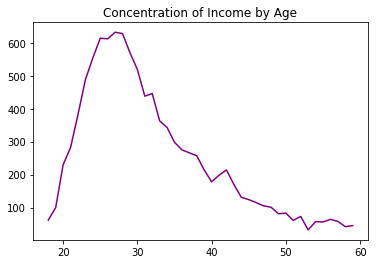

In [692]:
ax = sub1.groupby(["age"]).income.count() 
plt.plot(ax,color="purple")
plt.title("Concentration of Income by Age");


In [703]:
pd.crosstab(df1["income"],df1["sex"])

sex,f,m
income,,
-1,20564,27107
20000,1025,1910
30000,310,720
40000,329,656
50000,301,648
60000,207,510
70000,158,535
80000,249,830
100000,247,1340


In [702]:
pd.crosstab(df1["income"],df1["location"])


location,"alameda, california","albany, california","amsterdam, netherlands","arcadia, california","asheville, north carolina","ashland, california","astoria, new york","atherton, california","atlanta, georgia","austin, texas",...,"vallejo, california","vancouver, british columbia, canada","walnut creek, california","washington, district of columbia","waterford, california","west oakland, california","westlake, california","woodacre, california","woodbridge, virginia","woodside, california"
income,,,,,,,,,,,,,,,,,,,,,
-1,671,157,1,1,1,1,1,38,2,1,...,372,0,495,2,1,7,10,7,2,8
20000,54,15,0,0,0,0,0,1,0,0,...,74,0,19,0,0,0,0,2,0,0
30000,28,7,0,0,0,0,0,2,0,0,...,17,0,7,0,0,0,0,0,0,0
40000,24,11,0,0,0,0,0,0,0,0,...,20,0,20,0,0,0,0,3,0,0
50000,28,8,0,0,0,0,0,0,0,0,...,22,0,19,0,0,0,0,1,0,0
60000,12,3,0,0,0,0,0,0,0,0,...,12,1,10,0,0,0,1,0,0,0
70000,16,5,0,0,0,0,0,2,0,0,...,10,0,8,0,0,0,0,0,0,0
80000,23,6,0,0,0,0,0,0,0,0,...,8,0,18,0,0,0,0,0,0,1
100000,27,6,0,0,0,0,0,0,0,0,...,6,0,26,0,0,0,0,0,0,2


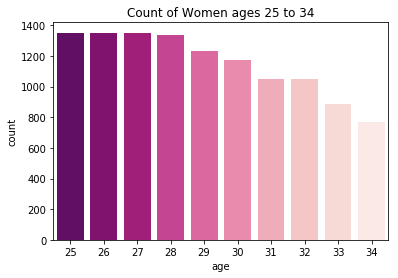

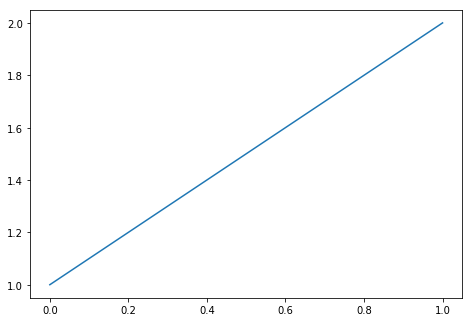

In [674]:
sns.countplot(x="age", data=dfwomen_2534, palette="RdPu_r")
plt.title("Count of Women ages 25 to 34");



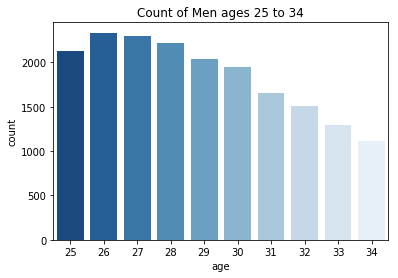

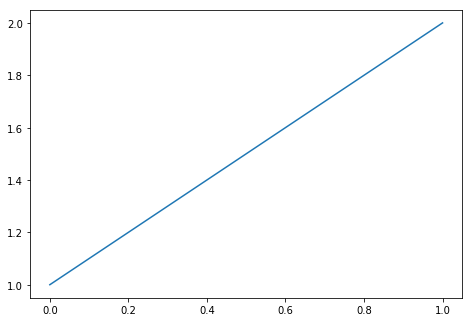

In [675]:
sns.countplot(x="age", data=dfmen_2534,palette="Blues_r")
plt.title("Count of Men ages 25 to 34");



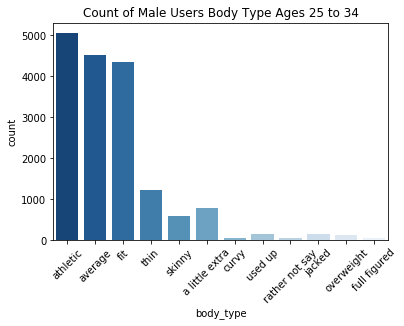

In [728]:
sns.countplot(x="body_type", data=dfmen_2534, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Count of Male Users Body Type Ages 25 to 34");



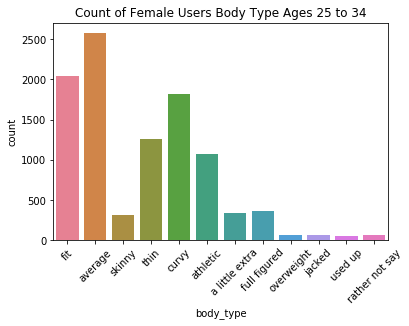

In [727]:
sns.countplot(x="body_type", data=dfwomen_2534,palette="husl")
plt.xticks(rotation=45)
plt.title("Count of Female Users Body Type Ages 25 to 34");



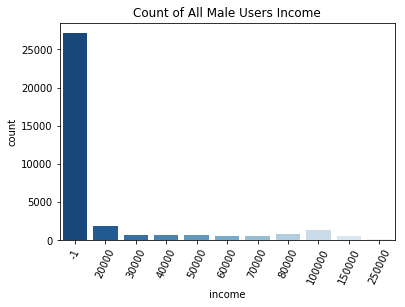

In [731]:
sns.countplot(x="income", data=dfmale_users,palette="Blues_r")
plt.xticks(rotation=65)
plt.title("Count of All Male Users Income");



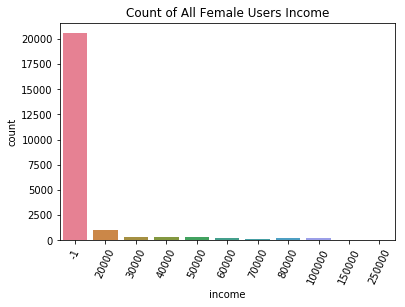

In [732]:
sns.countplot(x="income", data=dfwomen_users,palette="husl")
plt.xticks(rotation=65)
plt.title("Count of All Female Users Income");



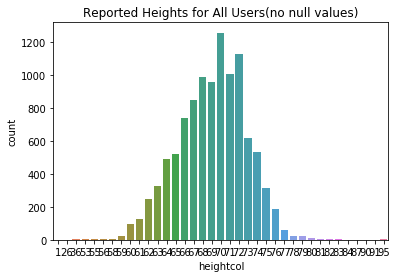

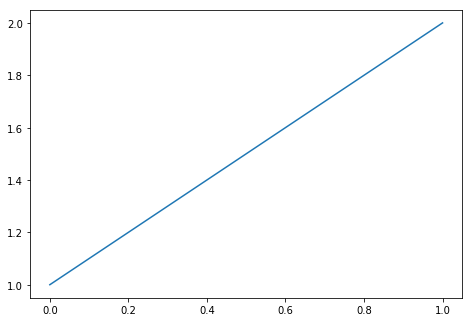

In [680]:
sns.countplot(x="heightcol",data=sub1,palette="husl")
plt.title("Reported Heights for All Users(no null values)");



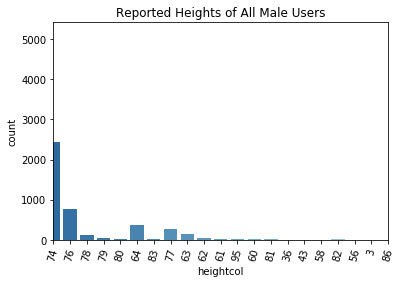

In [683]:
sns.countplot(x="heightcol", data=dfmale_users,palette="Blues_r").set(xlim=(10,30))
plt.xticks(rotation=75)

plt.title("Reported Heights of All Male Users");


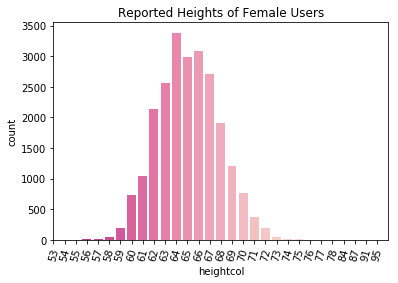

In [414]:
sns.countplot(x="heightcol", data=dfwomen_users,palette="RdPu_r").set(xlim=(10,40))
plt.xticks(rotation=75)
plt.title("Reported Heights of Female Users");

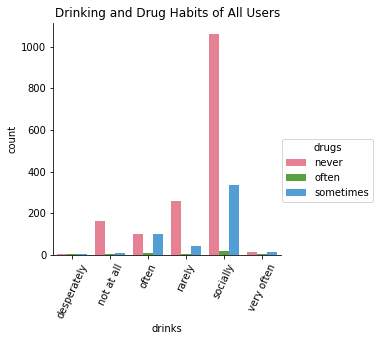

In [415]:
sns.factorplot(x="drinks", hue="drugs",data=sub1, kind="count", palette="husl")
plt.xticks(rotation=65)
plt.title("Drinking and Drug Habits of All Users");

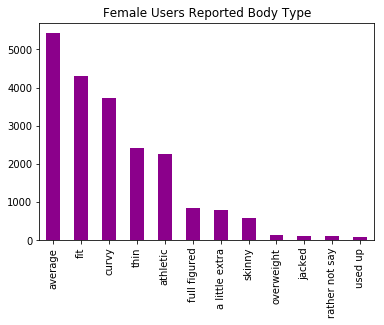

In [447]:
pd.value_counts(dfwomen_users["body_type"]).plot.bar(color="darkmagenta")
plt.title("Female Users Reported Body Type");

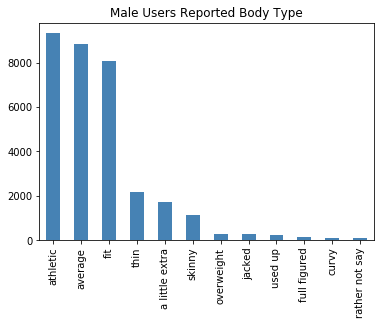

In [454]:
pd.value_counts(dfmale_users["body_type"]).plot.bar(color="steelblue")
plt.title("Male Users Reported Body Type");

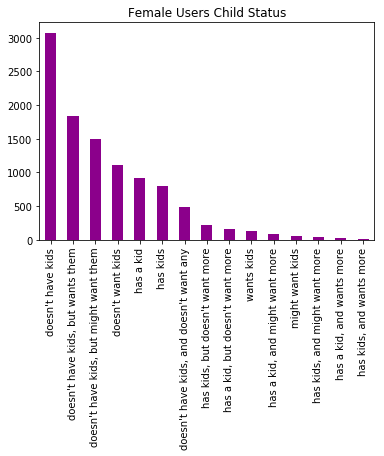

In [425]:
pd.value_counts(dfwomen_users["offspring"]).plot.bar(color="darkmagenta")
plt.title("Female Users Child Status");

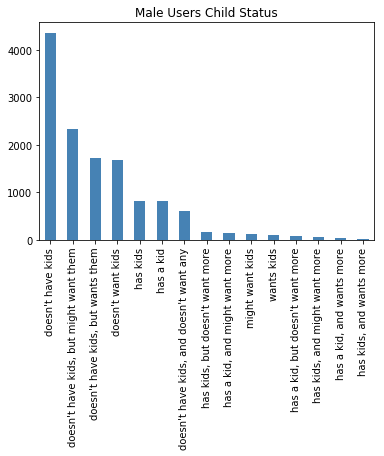

In [455]:
pd.value_counts(dfmale_users["offspring"]).plot.bar(color="steelblue")
plt.title("Male Users Child Status");

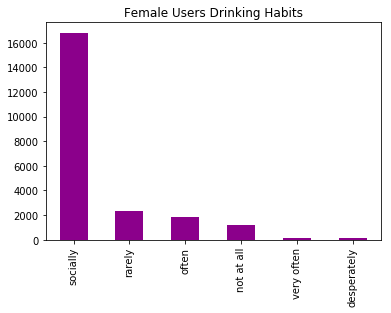

In [456]:
pd.value_counts(dfwomen_users["drinks"]).plot.bar(color="darkmagenta")
plt.title("Female Users Drinking Habits");

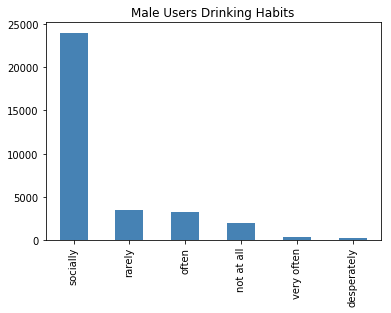

In [457]:
pd.value_counts(dfmale_users["drinks"]).plot.bar(color="steelblue")
plt.title("Male Users Drinking Habits");

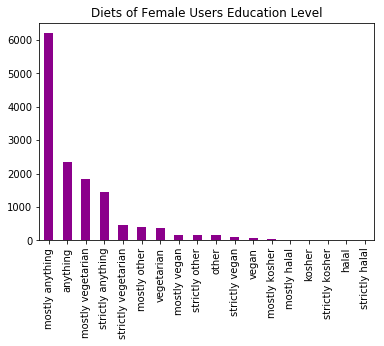

In [459]:
pd.value_counts(dfwomen_users["diet"]).plot.bar(color="darkmagenta")
plt.title("Diets of Female Users Education Level");

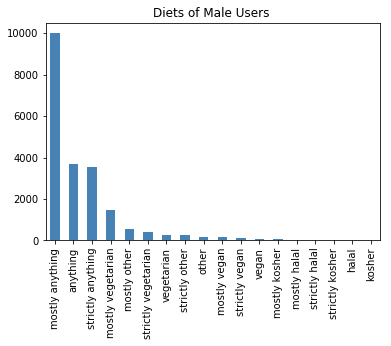

In [460]:
pd.value_counts(dfmale_users["diet"]).plot.bar(colors="steelblue")
plt.title("Diets of Male Users ");

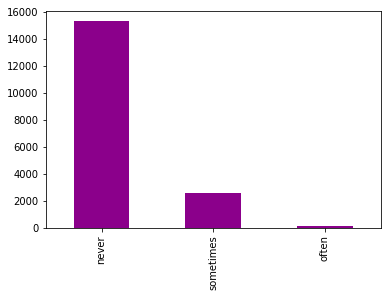

In [461]:
pd.value_counts(dfwomen_users["drugs"]).plot.bar(colors="darkmagenta")

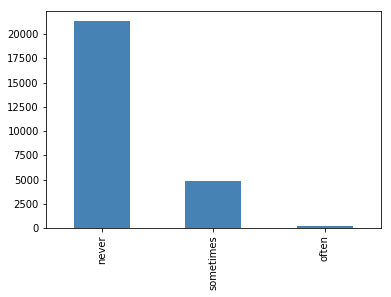

In [462]:
pd.value_counts(dfmale_users["drugs"]).plot.bar(colors="steelblue")

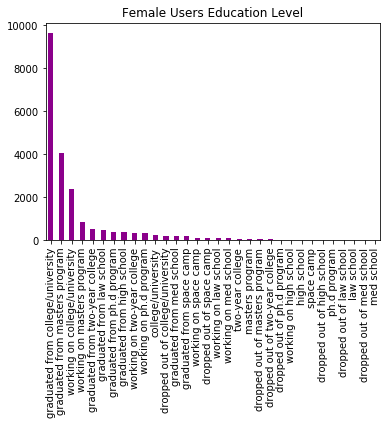

In [463]:
pd.value_counts(dfwomen_users["education"]).plot.bar(colors="darkmagenta")
plt.title("Female Users Education Level");

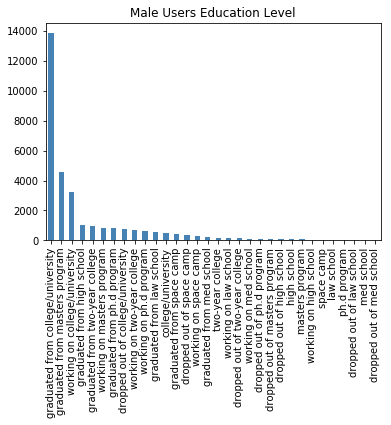

In [464]:
pd.value_counts(dfmale_users["education"]).plot.bar(colors="steelblue")
plt.title("Male Users Education Level");

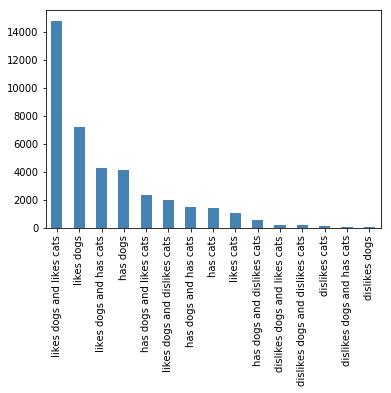

In [467]:
pd.value_counts(df["pets"]).plot.bar(colors="steelblue")

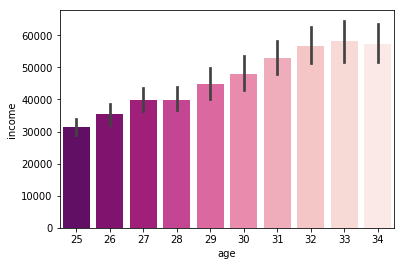

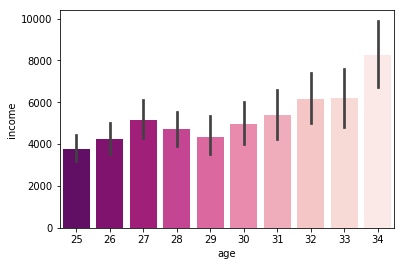

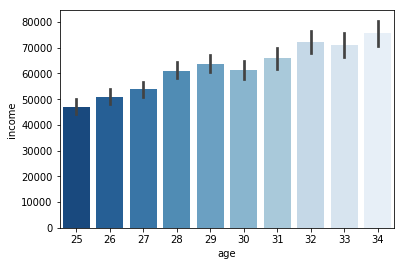

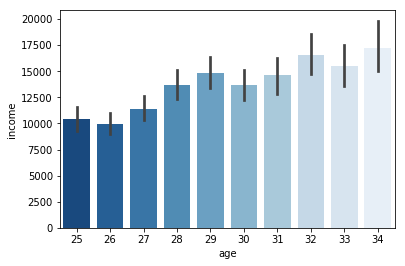

In [691]:
wx = sns.barplot(x='age',y="income", data = women_2534, palette="RdPu_r")
plt.show(wx)


wx = sns.barplot(x='age',y="income", data = dfwomen_2534, palette= "RdPu_r")
plt.show(wx)

mx = sns.barplot (x='age',y="income",data = men_2534,palette="Blues_r")
plt.show(mx)

mx = sns.barplot (x='age',y="income",data = dfmen_2534,palette="Blues_r")
plt.show(mx)


Now that we have visualized and summarized the data, we want to think about how these data can inform the Marketing Department's future decisions. Ad buys are often done based on demographic segments, e.g. males 18-24, females 18-24, males 25-34, females 25-34, males 35-44, females 35-44, and everyone over age 45.

** QUESTION 1. What market segments might the marketing department be interested in? What are our sample sizes for each of these markets? **

*The market OKCUPID should most be focused on is women ages 25-34 and men ages 25-34 with sample sizes of 12,088 and 18,991, respectively. Also, there are more male then female users in San Francisco. There are 12,521 female users and 18,543 male users.*

** QUESTION 2. What do our summary stats tell us about each groups?  ** 

*The measures of central tendencies tell us what the mean(average) age is for all users. We can also break this down further to find the mean age for men/women, and men/women in certain age brackets. The median splits our data into two halves, lower and upper. Our mode tells us the most reoccuring value. Running mode on our various subsets we can see what the most commonly chosen answers are for women/men overall and for men/women in certain age brackets. The mean age for female users is 32 with a minimum age of 18 and maximum age of 60. The mean age for male users is 31.6 with a minimum age of 18 and a miximum age of 60. 

Most commonly chosen answers among women are average for bodytype, mostly anything for diet, soical drinkers, who are Caucasian and college educated with religion listed as other. Most common astrological sign for women is Gemini. 

Most commonly chosen answers among men are athletic for bodytype, mostly anyting for diet,, social drinkers who are Caucasian and college educated with religion listed as agnositc. Most common astrological sign for men is Virgo.  

It is interesting to note that though both men and women,in the same age bracket, commonly listed their diet as "eat mostly anything" they rated their bodytypes very differently. 


** QUESTION 3. What is the buy power of each group? ** 

*Taking into consideration the inclusion of negative values in the original dataset statitics were also computed against a subset that removed all outliers, negative and null values to compare consistency of results. This subset was significantly smaller containg roughly eleven thousand values of the original sixty thousand plus. Statistical comparison of both sets of dataframes proved the following insights to be consistent: Of all the male/female age brackets the one with the highest buying power given sample size and income would be men ages 25 to 35 followed by women ages 25 to 34. Based off of income solely, the group with the highest buying power skews older with men in the 45 an old age brackets leading and women in the 45 an older age bracket coming in second. Consistently, regardless of age bracket, men had the highest buying power based on icome.*


** QUESTION 5. Is there a difference in mean incomes between men and women of the same age group (25 - 34). **

*The p-value is 7.8e-141, significanly less than our alpha of 0.05. This means that there is statistical significance between the mean incomes of men and women. The mean income for men is $13,294 with and STD of $32,267. The mean income for women is $5,153 with an STD of $17,355. The dataset used included -1 values as these were students and to exclude them from the dataset would dratically reduce the overall size of our dataset so the mean and consequently the STD is somewhat skewed but the results are in keeping with statistics fun on income using data that excluded outliers and negative values as well as null values. Men consistent, across the board, had a higher income than women.*


In [687]:
women_users = sub1[sub1["sex"] == "f"]
male_users = sub1[sub1["sex"]== "m"]

women_1824 = women_users[(women_users.age==18) & (women_users.age<=24)]
women_2534 = women_users[(women_users.age>=25) & (women_users.age<=34)]
women_3544 = women_users[(women_users.age>=35) & (women_users.age<=44)]
women_45 = women_users[(women_users.age>45)] #20k to 150k, mean 66k, std is 29k 

income_w1824 = women_users[(women_users.income==18) & (women_users.income<=24)]#20k to 50k, mean 23k, std 7K
income_w2534 = women_users[(women_users.income>=25) & (women_users.income<=34)]#20K to 150K, mean 45k, std 28K 
income_w3544 = women_users[(women_users.income>=35) & (women_users.income<=44)]#20k to 150K, mean 65K, std 33K 

men_1824 = male_users[(male_users.age==18) & (male_users.age<=24)]#20k to 100k, mean 23k, std, 14k
men_2534 = male_users[(male_users.age>=25) & (male_users.age<=34)]#20k to 150k, mean 60k, std is 36K
men_3544 = male_users[(male_users.age>=35) & (male_users.age<=44)]#20K to 150k, mean 77K, std is 37K
men_45 = male_users[(male_users.age>45)]#20K to 150K, mean 78K, std 37K

income_m1824 = male_users[(male_users.income==18) & (male_users.income<=24)]
income_m2534 = male_users[(male_users.income>=25) & (male_users.income<=34)]
income_m3544 = male_users[(male_users.income>=35) & (male_users.income<=44)]


women_2534["income"].value_counts()


20000     429
40000     192
30000     173
50000     163
60000     105
80000      99
100000     81
70000      51
150000     22
Name: income, dtype: int64

In [685]:
dfwomen_users = df1[df1["sex"] == "f"]
dfmale_users = df1[df1["sex"]== "m"]

dfwomen_1824 = dfwomen_users[(dfwomen_users.age==18) & (dfwomen_users.age<=24)]
dfwomen_2534 = dfwomen_users[(dfwomen_users.age>=25) & (dfwomen_users.age<=34)]
dfwomen_3544 = dfwomen_users[(dfwomen_users.age>=35) & (dfwomen_users.age<=44)]
dfwomen_45 = dfwomen_users[(dfwomen_users.age>45)]

dfmen_1824 = dfmale_users[(dfmale_users.age==18) & (dfmale_users.age<=24)]
dfmen_2534 = dfmale_users[(dfmale_users.age>=25) & (dfmale_users.age<=34)]
dfmen_3544 = dfmale_users[(dfmale_users.age>=35) & (dfmale_users.age<=44)]
dfmen_45 = dfmale_users[(dfmale_users.age>45)]


dfwomen_2534["income"].value_counts()

-1         10237
 20000       429
 40000       192
 30000       173
 50000       163
 60000       105
 80000        99
 100000       81
 70000        51
 150000       22
 250000        2
Name: income, dtype: int64

In [652]:
dfmale_users["diet"].mode()

0    mostly anything
dtype: object

In [210]:
dfmale_users["location"].value_counts()

san francisco, california          18543
oakland, california                 3631
berkeley, california                2389
san mateo, california                834
palo alto, california                683
alameda, california                  536
hayward, california                  490
daly city, california                485
emeryville, california               454
redwood city, california             422
san rafael, california               396
san leandro, california              393
walnut creek, california             382
vallejo, california                  378
south san francisco, california      290
mountain view, california            275
menlo park, california               273
richmond, california                 245
stanford, california                 243
novato, california                   219
burlingame, california               202
pleasant hill, california            200
san bruno, california                199
castro valley, california            197
pacifica, califo

In [176]:
count_dfw1824 = dfwomen_1824.count() #167
count_dfw2534 = dfwomen_2534.count() #12,088
count_dfw3544 = dfwomen_3544.count() #5,047
count_dfw45 = dfwomen_45.count() #2,388

count_dfm1824 = dfmen_1824.count() #149
count_dfm2534 = dfmen_2534.count() #18,991 
count_dfm3544 = dfmen_3544.count() #7,054
count_dfm45 = dfmen_45.count() #2,786

print count_dfm2534




age            18648
income         18648
sex            18648
body_type      17173
diet           11234
drinks         17676
drugs          13848
ethnicity      16829
location       18648
sign           14701
education      16637
religion       11954
offspring       6261
last_online    18648
heightcol      18648
dtype: int64


In [41]:
dfwomen_1824.count() #mean age is 18 and mean income is 166
count_dfw2534 = dfwomen_2534.count() #mean age is 29 and mean income is 5153 std is 2.77
count_dfw3544 = dfwomen_3544.count() #mean age is 38.77 and mean income is 7937 std is 2.83
dfwomen_45 #mean is 51.85 and mean income is 9450 std 4.288
#most common traits among women body_type is average, eat mostly anyting drink socially and 
#predoinately white, college educated and religion is other, mostly gemini

#most common traints among men body_type athletic, mostly eat anyting, drink socially
#predominately white, college eduated, religion is agnostic, mostly virgos

count_dfm1824 = dfmen_1824.count() #mean age is 18 and mean income is 5539 std is 0.0 
count_dfm2534 = dfmen_2534.count() #mean age is 28.9 and mean income is 13294 stid is 2.72 
count_dfm3544 = dfmen_3544.count() #mean age is 38.76 and mean income 19685 std is 2.81
dfmen_45 #mean age is 51 and income is 21334 std 4.182 

#dfwomen_users.describe(include="all")
#dfmale_users.describe(include="all")
#dfwomen_users.mode()
dfmale_users.mode()


,age,income,sex,body_type,diet,drinks,drugs,ethnicity,location,sign,education,religion,offspring
0,26,-1,m,athletic,mostly anything,socially,never,white,"san francisco, california",virgo but it doesn&rsquo;t matter,graduated from college/university,agnosticism and laughing about it,doesn't have kids


In [489]:
dfwomen_1824 = dfwomen_users[(dfwomen_users.age==18) & (dfwomen_users.age<=24)]#-1 to 50K, mean 3673 std 8759
dfwomen_2534 = dfwomen_users[(dfwomen_users.age>=25) & (dfwomen_users.age<=34)] #-1 to 250K, mean 5153, std 17335
dfwomen_3544 = dfwomen_users[(dfwomen_users.age>=35) & (dfwomen_users.age<=44)]# -1 to 250K, mean 7937, std 24410
dfwomen_45 = dfwomen_users[(dfwomen_users.age>45)] # -1 to 250K, mean 9450, std 25836

dfmen_1824 = dfmale_users[(dfmale_users.age==18) & (dfmale_users.age<=24)] #-1 to 100K, mean 5530, std 11854
dfmen_2534 = dfmale_users[(dfmale_users.age>=25) & (dfmale_users.age<=34)] #-1 to 250K, mean 13294, std 32267
dfmen_3544 = dfmale_users[(dfmale_users.age>=35) & (dfmale_users.age<=44)] #-1 to 250K, mean 19685, std 42216
dfmen_45 = dfmale_users[(dfmale_users.age>45)] #-1 to 250K, mean 21334, std 44245

dfwomen_2534.describe(include="all")


,age,income,sex,body_type,diet,drinks,drugs,ethnicity,location,sign,education,religion,offspring,last_online,heightcol
count,11554.000000,11554.000000,11554,10018,6680,11013,8660,10247,11554,9735,10532,7317,4562,11554,11554.000000
unique,NaN,NaN,1,12,18,6,3,118,89,48,32,45,15,8601,NaN
top,NaN,NaN,f,average,mostly anything,socially,never,white,"san francisco, california",gemini and it&rsquo;s fun to think about,graduated from college/university,agnosticism,doesn't have kids,2017-06-30-23-27,NaN
freq,NaN,NaN,11554,2580,2943,8482,7297,6105,6592,404,5292,612,1516,10,NaN
mean,29.029860,5130.670158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.118227
std,2.771557,17228.951244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991759
min,25.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,27.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
50%,29.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000
75%,31.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000


In [491]:
#dfwomen_users["offspring"].value_counts()
#dfmale_users["offspring"].value_counts()
dfwomen_users.describe(include="all")

,age,income,sex,body_type,diet,drinks,drugs,ethnicity,location,sign,education,religion,offspring,last_online,heightcol
count,23466.000000,23466.000000,23466,20797,13804,22376,18076,21105,23466,19860,21138,15346,10461,23466,23466.000000
unique,NaN,NaN,1,12,18,6,3,152,126,48,32,45,15,14860,NaN
top,NaN,NaN,f,average,mostly anything,socially,never,white,"san francisco, california",gemini and it&rsquo;s fun to think about,graduated from college/university,other,doesn't have kids,2017-06-29-23-39,NaN
freq,NaN,NaN,23466,5424,6202,16816,15335,12937,12084,829,9630,1258,3076,12,NaN
mean,32.146595,5880.398705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.105259
std,8.981814,19199.255881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.913162
min,18.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,26.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.000000
50%,30.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000
75%,37.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000


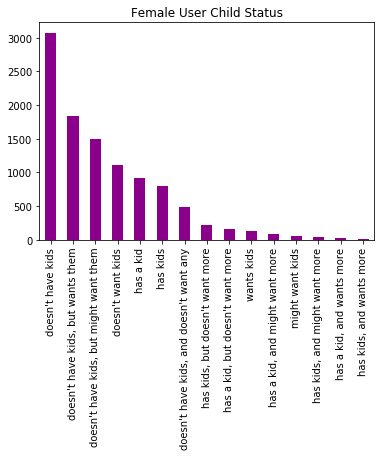

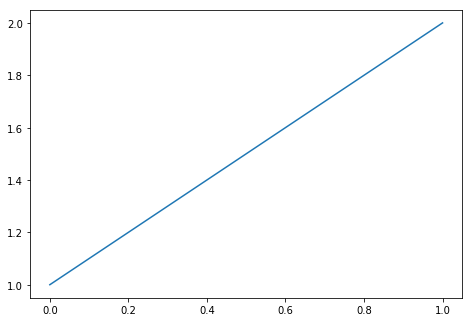

In [664]:
pd.value_counts(dfwomen_users["offspring"]).plot.bar(color="darkmagenta")
plt.title("Female User Child Status");

fig = plt.figure()
ax=fig.add_axes([1,1,1,1])
plt.plot([1,2])
fig.savefig("femalechildstatus.png", bbox_inches="tight")

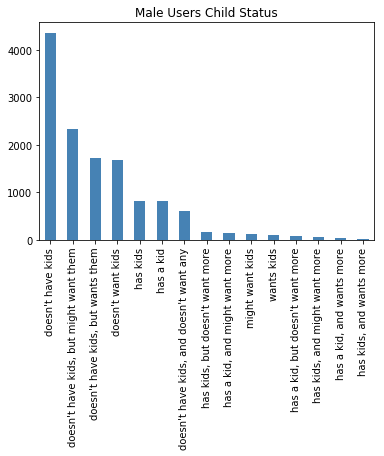

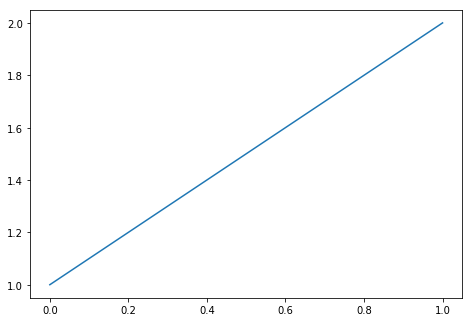

In [688]:
pd.value_counts(dfmale_users["offspring"]).plot.bar(color="steelblue")
plt.title("Male Users Child Status");

fig = plt.figure()
ax=fig.add_axes([1,1,1,1])
plt.plot([1,2])
fig.savefig("Malechildstatus.png", bbox_inches="tight")

In [124]:
#The mean and STD of income
mean_im2534 = income_m2534.mean()
mean_iw2534 = income_w2534.mean()

std_im2534 = income_m2534.std()
std_iw2534 = income_w2534.std()

#The mean and STD of age
std_w2534 = dfwomen_2534.std() #std is 2.772067
std_m2534 = dfmen_2534.std() #std is 2.720734

mean_w2534 = dfwomen_2534.mean()#mean is 29.030875 #income std is 17355 with mean of 5153 
mean_m2534 = dfmen_2534.mean()#mean is  28.900526 # income std is 32267 with a mean of 13294
dfwomen_1824.describe()



,age,income
count,166.0,166.000000
mean,18.0,3673.861446
std,0.0,8759.222092
min,18.0,-1.000000
25%,18.0,-1.000000
50%,18.0,-1.000000
75%,18.0,-1.000000
max,18.0,50000.000000


In [49]:
import scipy as sp
alpha = 0.05

ttest_value = sp.stats.ttest_ind(dfwomen_2534["income"], dfmen_2534["income"])


print ttest_value


Ttest_indResult(statistic=-25.396567580106545, pvalue=7.8866510348120179e-141)


** QUESTION 6 (Stretch/Optional): User engagement drives ad revenue. To make the biggest impact in your analysis, examine which group has the highest engagement? ** 

*Users with the most engagment (calculated by last time user was online) are first men ages 25 -34 followed by women ages 25-34 with 2600 and 2314 logins respectively. The next highest age bucket for both men and women would be 35-44 age range.*



In [164]:
import datetime

dfwomen_users = df1[df1["sex"] == "f"]
dfmale_users = df1[df1["sex"]== "m"]


#dfwomen_1824 = dfwomen_users[(dfwomen_users.age==18)]
#dftime_w1824 = dfwomen_1824
#dfwomen_2534 = dfwomen_users[(dfwomen_users.age>=25) & (dfwomen_users.age<=34)& (dfwomen_users.age<=24)]
#dfwomen_3544 = dfwomen_users[(dfwomen_users.age>=35) & (dfwomen_users.age<=44) &  (dfwomen_users.age<=24)]
#dfwomen_45 = dfwomen_users[(dfwomen_users.age>45)]

#dfmen_1824 = dfmale_users[(dfmale_users.age==18) & (dfmale_users.age<=24)]
#dfmen_2534 = dfmale_users[(dfmale_users.age>=25) & (dfmale_users.age<=34)]
#dfmen_3544 = dfmale_users[(dfmale_users.age>=35) & (dfmale_users.age<=44)]
#dfmen_45 = dfmale_users[(dfmale_users.age>45)]


df1["last_online"] = pd.to_datetime(df1["last_online"],errors="coerce")
dfwomen_users['last_online'].dt.date.groupby([dfwomen_users.sex,dfwomen_users.age]).nunique()


sex  age
f    18      69
     19     110
     20     156
     21     168
     22     201
     23     222
     24     243
     25     257
     26     262
     27     263
     28     254
     29     238
     30     239
     31     212
     32     227
     33     185
     34     177
     35     158
     36     162
     37     145
     38     132
     39     121
     40     125
     41     112
     42     123
     43     110
     44      98
     45      80
     46      86
     47      84
     48      57
     49      65
     50      78
     51      78
     52      66
     53      46
     54      46
     55      55
     56      65
     57      55
     58      44
     59      57
     60      46
Name: last_online, dtype: int64

In [165]:
dfmale_users['last_online'].dt.date.groupby([dfmale_users.sex,dfmale_users.age]).nunique()


sex  age
m    18      80
     19     135
     20     175
     21     178
     22     225
     23     256
     24     280
     25     286
     26     295
     27     300
     28     275
     29     261
     30     257
     31     247
     32     246
     33     230
     34     203
     35     201
     36     177
     37     167
     38     159
     39     154
     40     138
     41     163
     42     134
     43     122
     44     110
     45      94
     46     111
     47      75
     48      87
     49      70
     50      83
     51      74
     52      58
     53      43
     54      53
     55      55
     56      45
     57      52
     58      33
     59      42
     60      32
Name: last_online, dtype: int64